
Actividad 6: Redes Neuronales. Nombre: Yessica Sughey Cantú Morón. Matricula: 1900009. Hora: LMV-N4

In [ ]:
#CARGAR LIBRERIAS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [ ]:
#CARGAR DATOS
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
#assert train_images.shape == (60000, 28, 28)
#assert test_images.shape == (10000, 28, 28)
#assert train_labels.shape == (60000,)
#assert test_labels.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


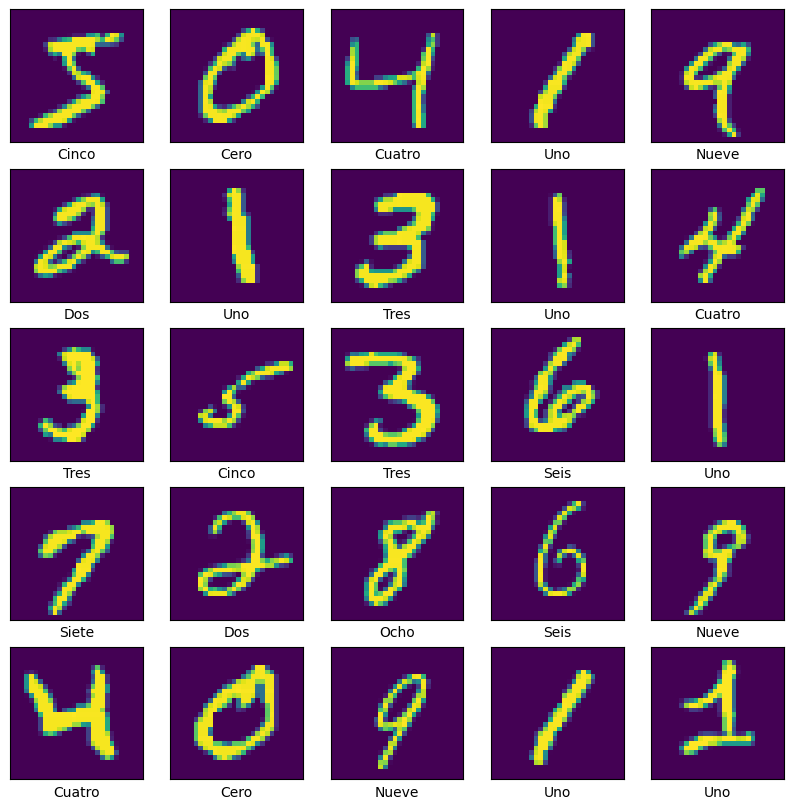

In [ ]:
#PREPROCESAMIENTO
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#SELECCIÓN Y ENTRENAMIENTO
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 56)          28280     
                                                                 
Total params: 42728 (166.91 KB)
Trainable params: 4272

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.2747 - accuracy: 0.9225 - val_loss: 0.0652 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0477 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0397 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0317 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0369 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0360 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.0371 - accuracy: 0.9889 - 3s/epoch - 8ms/step

Test accuracy: 0.9889000058174133


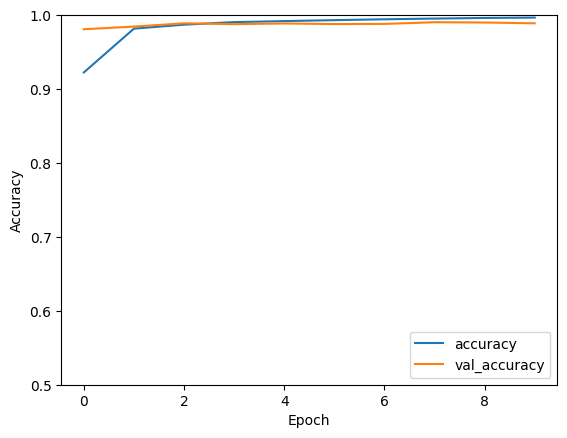

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [ ]:
# PRUEBA DE MODELO
#PREDICCIÓN 1
predictions[0]

array([ -8.615189  ,  -1.9665407 ,  -5.4957867 ,  -4.558731  ,
        -3.4091032 ,  -6.2832966 , -11.770974  ,  12.459247  ,
        -9.075855  ,  -0.75360376], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
predictions[5]

array([-10.719089 ,  10.576295 ,  -6.5696163,  -8.640139 ,  -5.093386 ,
        -8.272156 ,  -7.7409244,  -3.1610255,  -4.4556227,  -5.075264 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

In [ ]:
#PREDICCIÓN 2
predictions[42]

array([-11.18648  ,  -2.5328581, -10.411223 ,  -8.67353  ,  11.633504 ,
       -12.052673 ,  -5.373933 ,  -3.7732441,  -0.5532746,  -0.6773764],
      dtype=float32)

In [ ]:
np.argmax(predictions[42])

4

In [ ]:
test_labels[42]

4

In [ ]:
#PREDICCIÓN 3
predictions[26]

array([ -9.910155  ,  -0.36795104,  -4.869052  ,  -3.1528728 ,
        -3.2701674 ,  -5.7149973 , -10.272685  ,  12.391581  ,
        -7.9162593 ,  -3.4666226 ], dtype=float32)

In [ ]:
np.argmax(predictions[26])

7

In [ ]:
test_labels[26]

7

In [ ]:
#PREDICCIÓN 4
predictions[14]

array([-10.771685 ,  11.034989 ,  -7.2390594,  -7.6869173,  -2.4397163,
        -5.2532763,  -5.3826394,  -3.0852814,  -7.473855 ,  -5.592282 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[14])

1

In [ ]:
test_labels[14]

1

In [ ]:
#PREDICCIÓN 5
predictions[66]

array([  1.1192853 ,  -7.7706513 ,  -6.7838902 ,  -7.45149   ,
        -2.5039685 ,   2.359763  ,  11.575486  , -14.843437  ,
         0.24940799,  -5.9053106 ], dtype=float32)

In [ ]:
np.argmax(predictions[66])

6

In [ ]:
test_labels[66]

6

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

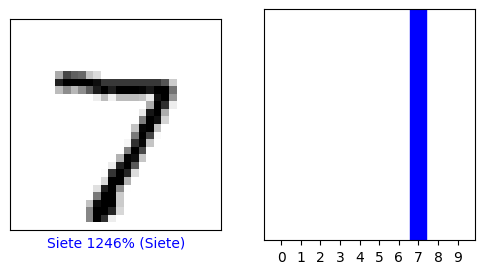

In [ ]:
#GRAFICAS DE PREDICCIONES 1-5
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

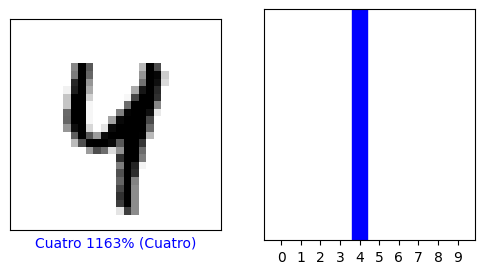

In [ ]:
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

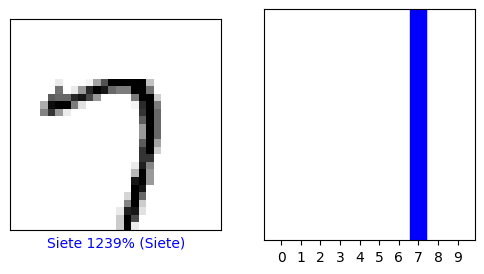

In [ ]:
i = 26
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

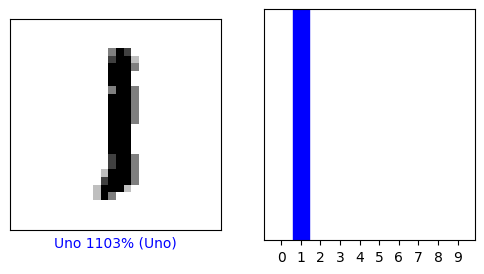

In [ ]:
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

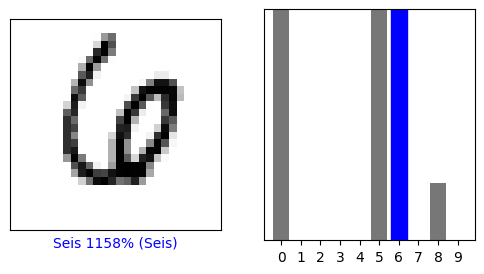

In [ ]:
i = 66
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

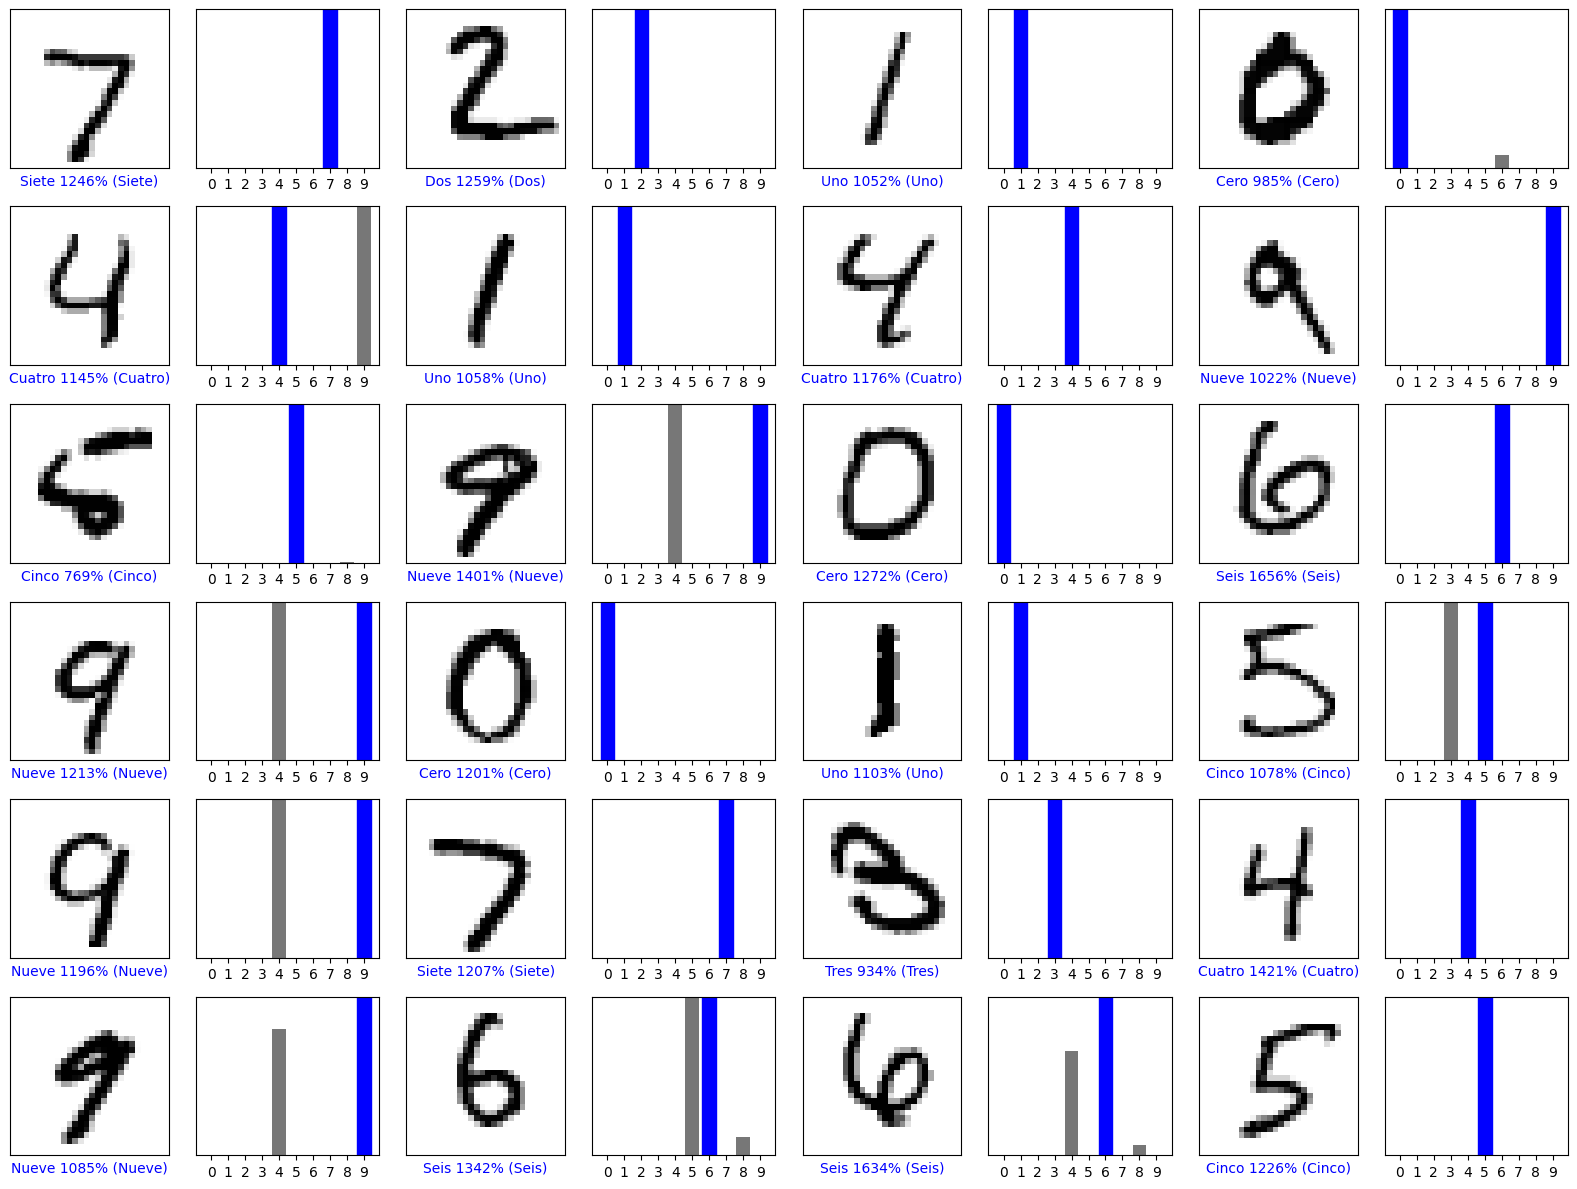

In [ ]:
#GRAFICAS DE IMAGENES
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#MODELO PARA UNA SOLA IMAGEN
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[ -1.1658186  -1.8294363  12.593364   -5.79623    -6.904021  -11.258167
   -6.1948814  -8.083124   -2.8149374 -11.172571 ]]


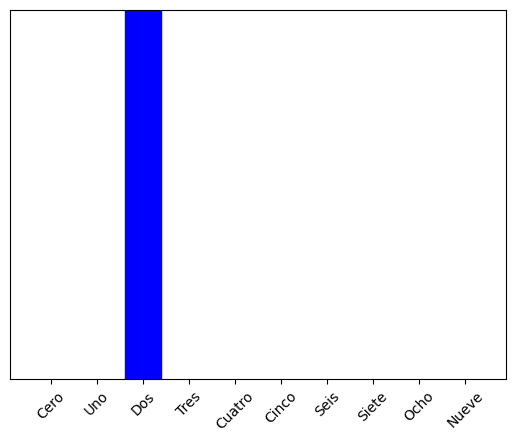

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

In [ ]:
#¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
#Utilicé 10 épocas al igual que en la actividad 5.

#¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
#Creo que se obtuvo un mal rendimiento ya que esta por encima del 100% y eso sugiere un problema.